In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2
import os

## CNN Model For Identify Shapes

In [4]:
import pathlib
train_data_dir = pathlib.Path('<Location>/trafficsigns_dataset')
train_data_dir

PosixPath('/content/drive/MyDrive/Anojan/trafficsigns_dataset')

In [ ]:
image_count = len(list(train_data_dir.glob('*/*/*.png')))
print(image_count)

3664


In [ ]:
shapes_dict = {
    'diamond': list(train_data_dir.glob('diamond/*/*.png')),
    'hex': list(train_data_dir.glob('hex/*/*.png')),
    'round': list(train_data_dir.glob('round/*/*.png')),
    'square': list(train_data_dir.glob('square/*/*.png')),
    'triangle': list(train_data_dir.glob('triangle/*/*.png')),
}

In [ ]:
shapes_id_dict = {
    'diamond': 0,
    'hex': 1,
    'round': 2,
    'square': 3,
    'triangle': 4,
}

In [ ]:
Xs, ys = [], []

for id_name, images in shapes_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(28,28))
        Xs.append(resized_img)
        ys.append(shapes_id_dict[id_name])

In [ ]:
Xs = np.array(Xs)
ys = np.array(ys)

In [ ]:
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, random_state=0)

In [ ]:
Xs_train_scaled = Xs_train / 255
Xs_test_scaled = Xs_test / 255

In [ ]:
model2 = keras.Sequential([
                          #  data_augmentation,
                           keras.layers.Conv2D(8, 3, padding='same', activation='relu',input_shape=(28,28,3)),
                           keras.layers.MaxPool2D(),
                           #
                           keras.layers.Conv2D(16, 3, padding='same',activation='relu'),
                           keras.layers.MaxPool2D(),
                           #
                           keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
                           keras.layers.MaxPool2D(),
                           keras.layers.Dropout(0.2),
                           ##
                           keras.layers.Flatten(),
                           ##
                           keras.layers.Dense(10,activation='relu'),
                           ##
                           keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(Xs_train_scaled, ys_train, epochs=15)

Epoch 1/15
86/86 [==============================] - 2s 19ms/step - loss: 1.2814 - accuracy: 0.4876
Epoch 2/15
86/86 [==============================] - 2s 19ms/step - loss: 1.0987 - accuracy: 0.5884
Epoch 3/15
86/86 [==============================] - 2s 19ms/step - loss: 0.7310 - accuracy: 0.7380
Epoch 4/15
86/86 [==============================] - 2s 19ms/step - loss: 0.3799 - accuracy: 0.8930
Epoch 5/15
86/86 [==============================] - 2s 19ms/step - loss: 0.2404 - accuracy: 0.9301
Epoch 6/15
86/86 [==============================] - 2s 19ms/step - loss: 0.1692 - accuracy: 0.9491
Epoch 7/15
86/86 [==============================] - 2s 19ms/step - loss: 0.1261 - accuracy: 0.9618
Epoch 8/15
86/86 [==============================] - 2s 19ms/step - loss: 0.0989 - accuracy: 0.9749
Epoch 9/15
86/86 [==============================] - 2s 19ms/step - loss: 0.0913 - accuracy: 0.9723
Epoch 10/15
86/86 [==============================] - 2s 19ms/step - loss: 0.0778 - accuracy: 0.9771
Epoch 11/

In [ ]:
model2.evaluate(Xs_test_scaled,ys_test)

29/29 [==============================] - 0s 9ms/step - loss: 0.0484 - accuracy: 0.9891


[0.048414476215839386, 0.9890829920768738]

In [ ]:
model2.save('<Location>/traffic_light_shapes')

In [5]:
mds =  tf.keras.models.load_model('<Location>/traffic_light_shapes')

In [7]:
test_dir = pathlib.Path('<Location>/Test')
test_image_count = len(list(test_dir.glob('*.png')))
print(test_image_count)

40


In [94]:
testS_dict = {
    'test': list(test_dir.glob('5.png')),
}

In [95]:
tts = []
for id_name, images in testS_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(28,28))
        tts.append(resized_img)

In [96]:
tts = np.array(tts)
tts = tts/255

In [97]:
valS = mds.predict(tts)
valS

array([[9.9997282e-01, 2.6945771e-05, 2.6455430e-07, 2.7016666e-16,
        5.8674935e-08]], dtype=float32)

In [98]:
ls2 = ['diamond','hex','round','square','triangle']

diamond


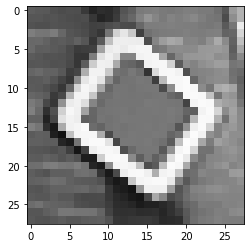

In [99]:
max_index = np.argmax(valS)
plt.imshow(resized_img)
print(ls2[max_index])

# Model using Ranndom Forest

In [ ]:
nsamples, nx, ny, nrgb = Xs_train_scaled.shape
xs_train2 = Xs_train_scaled.reshape((nsamples,nx*ny*nrgb))

In [ ]:
nsamples, nx, ny, nrgb = Xs_test_scaled.shape
xs_test2 = Xs_test_scaled.reshape((nsamples,nx*ny*nrgb))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(xs_train2, ys_train)

RandomForestClassifier()

In [ ]:
y_pred=clf.predict(xs_test2)
y_pred

array([2, 2, 4, 3, 4, 2, 2, 4, 3, 4, 2, 3, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2,
       2, 2, 3, 2, 2, 3, 4, 0, 4, 4, 4, 3, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 4, 3, 2, 2, 2, 2, 4, 4, 2, 2, 0, 3, 4, 3, 0, 2, 3, 2, 2, 2,
       2, 2, 4, 4, 3, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 3, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 0, 2, 2, 3, 2, 2, 2, 4, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 4, 2, 2, 2, 2, 0, 2, 2, 0, 4, 2, 3, 2, 2, 2, 2, 3, 2,
       4, 2, 2, 2, 4, 3, 3, 3, 3, 2, 2, 1, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 0, 2, 4, 0, 3, 2, 2, 4, 0, 3, 4, 0, 1, 0, 3,
       3, 2, 4, 3, 2, 2, 4, 3, 2, 3, 3, 2, 4, 3, 4, 3, 2, 2, 4, 4, 2, 4,
       3, 2, 4, 2, 2, 3, 4, 0, 2, 2, 4, 2, 4, 4, 3, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 2, 4, 2, 4, 2, 3, 3, 3, 0, 2, 2, 2, 4, 3, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4,
       2, 0, 3, 2, 3, 2, 2, 2, 4, 2, 4, 0, 0, 2, 4, 2, 2, 4, 3, 4, 2, 2,
       4, 2, 2, 2, 3, 2, 4, 2, 2, 2, 4, 4, 0, 2, 4,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,ys_test)
print(classification_report(y_pred,ys_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        61
           1       0.50      1.00      0.67         7
           2       0.99      0.95      0.97       465
           3       0.94      0.97      0.96       147
           4       0.97      0.97      0.97       236

    accuracy                           0.96       916
   macro avg       0.86      0.98      0.90       916
weighted avg       0.97      0.96      0.96       916



## You can see accuracy of Random Forests is **0.96** and accuracy CNN **0.98** so CNN model is better than Random Forest

## CNN Model For Identify Types

In [ ]:
id_card_dict = {
    'rightofway': list(train_data_dir.glob('diamond/rightofway/*.png')),
    'stop': list(train_data_dir.glob('hex/stop/*.png')),
    'bicycle': list(train_data_dir.glob('round/bicycle/*.png')),
    'limitedtraffic': list(train_data_dir.glob('round/limitedtraffic/*.png')),
    'noentry': list(train_data_dir.glob('round/noentry/*.png')),
    'noparking': list(train_data_dir.glob('round/noparking/*.png')),
    'roundabout': list(train_data_dir.glob('round/roundabout/*.png')),
    'speed': list(train_data_dir.glob('round/speed/*.png')),
    'trafficdirective': list(train_data_dir.glob('round/trafficdirective/*.png')),
    'traveldirection': list(train_data_dir.glob('round/traveldirection/*.png')),
    'continue': list(train_data_dir.glob('square/continue/*.png')),
    'crossing': list(train_data_dir.glob('square/crossing/*.png')),
    'laneend': list(train_data_dir.glob('square/laneend/*.png')),
    'parking': list(train_data_dir.glob('square/parking/*.png')),
    'giveway': list(train_data_dir.glob('triangle/giveway/*.png')),
    'warning': list(train_data_dir.glob('triangle/warning/*.png')),
}

In [ ]:
id_card_labels_dict = {
    'rightofway': 0,
    'stop': 1,
    'bicycle': 2,
    'limitedtraffic': 3,
    'noentry': 4,
    'noparking': 5,
    'roundabout': 6,
    'speed': 7,
    'trafficdirective': 8,
    'traveldirection': 9,
    'continue': 10,
    'crossing': 11,
    'laneend': 12,
    'parking': 13,
    'giveway': 14,
    'warning': 15,
}

In [ ]:
X, y = [], []

for id_name, images in id_card_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(28,28))
        X.append(resized_img)
        y.append(id_card_labels_dict[id_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(28,28)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = keras.Sequential([
                          #  data_augmentation,
                           keras.layers.Conv2D(8, 3, padding='same', activation='relu',input_shape=(28,28,3)),
                           keras.layers.MaxPool2D(),
                           #
                           keras.layers.Conv2D(16, 3, padding='same',activation='relu'),
                           keras.layers.MaxPool2D(),
                           #
                           keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
                           keras.layers.MaxPool2D(),
                           keras.layers.Dropout(0.2),
                           ##
                           keras.layers.Flatten(),
                           ##
                           keras.layers.Dense(10,activation='relu'),
                           ##
                           keras.layers.Dense(16,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
86/86 [==============================] - 2s 19ms/step - loss: 2.5834 - accuracy: 0.2209
Epoch 2/15
86/86 [==============================] - 2s 19ms/step - loss: 1.9425 - accuracy: 0.4454
Epoch 3/15
86/86 [==============================] - 2s 19ms/step - loss: 1.2925 - accuracy: 0.6394
Epoch 4/15
86/86 [==============================] - 2s 20ms/step - loss: 0.9136 - accuracy: 0.7362
Epoch 5/15
86/86 [==============================] - 2s 21ms/step - loss: 0.6995 - accuracy: 0.7926
Epoch 6/15
86/86 [==============================] - 2s 21ms/step - loss: 0.5588 - accuracy: 0.8370
Epoch 7/15
86/86 [==============================] - 2s 21ms/step - loss: 0.4761 - accuracy: 0.8570
Epoch 8/15
86/86 [==============================] - 2s 21ms/step - loss: 0.4188 - accuracy: 0.8741
Epoch 9/15
86/86 [==============================] - 2s 21ms/step - loss: 0.3825 - accuracy: 0.8774
Epoch 10/15
86/86 [==============================] - 2s 21ms/step - loss: 0.3276 - accuracy: 0.9039
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 8ms/step - loss: 0.2013 - accuracy: 0.9552


[0.2013154774904251, 0.9552401900291443]

In [ ]:
model.save('<Location>/traffic_light')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Anojan/traffic_light/assets


In [28]:
md =  tf.keras.models.load_model('<Location>/traffic_light')

In [ ]:
test_dir = pathlib.Path('<Location>/Test')
test_image_count = len(list(test_dir.glob('*.png')))
print(test_image_count)

37


In [106]:
test_dict = {
    'test': list(test_dir.glob('5.png')),
}

In [107]:
tt = []
for id_name, images in test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(28,28))
        tt.append(resized_img)

In [108]:
tt = np.array(tt)
tt = tt/255

In [109]:
val = md.predict(tt)
val

array([[9.9994636e-01, 5.1030154e-14, 3.1925038e-13, 1.2709887e-08,
        4.7639852e-15, 1.2084649e-13, 5.0455496e-05, 8.9408642e-10,
        1.0676533e-09, 1.2322272e-09, 2.8973719e-23, 5.4396969e-19,
        4.6249053e-11, 7.1511193e-09, 1.9270247e-11, 3.2441080e-06]],
      dtype=float32)

In [110]:
ls = ['rightofway','stop','bicycle','limitedtraffic','noentry','noparking','roundabout','speed','trafficdirective','traveldirection','continue','crossing','laneend','parking','giveway','warning']

rightofway


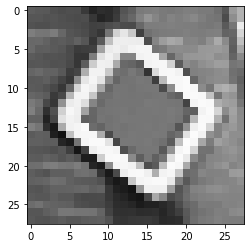

In [111]:
max_index = np.argmax(val)
plt.imshow(resized_img)
print(ls[max_index])

# Final Result

In [135]:
test_dir = pathlib.Path('<Location>/Test')
test_image_count = len(list(test_dir.glob('*.png')))
test_dict = {
    'test': list(test_dir.glob('00021_00000.png')),
}

In [136]:
tt_all = []
for id_name, images in test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(28,28))
        tt_all.append(resized_img)

In [137]:
tt_all = np.array(tt_all)
tt_all = tt_all/255
val_shape = mds.predict(tt_all)
val_type = md.predict(tt_all)

In [138]:
ls = ['rightofway','stop','bicycle','limitedtraffic','noentry','noparking','roundabout','speed','trafficdirective','traveldirection','continue','crossing','laneend','parking','giveway','warning']
ls2 = ['diamond','hex','round','square','triangle']

Type : trafficdirective
Shape : round


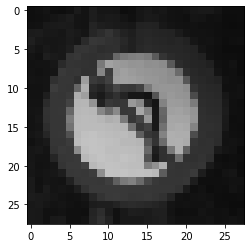

In [139]:
max_index_type = np.argmax(val_type)
max_index_shape = np.argmax(val_shape)
plt.imshow(resized_img)
print("Type : " + ls[max_index_type])
print("Shape : " + ls2[max_index_shape])